In [1]:
import pandas as pd

data = pd.read_csv('../raw_data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


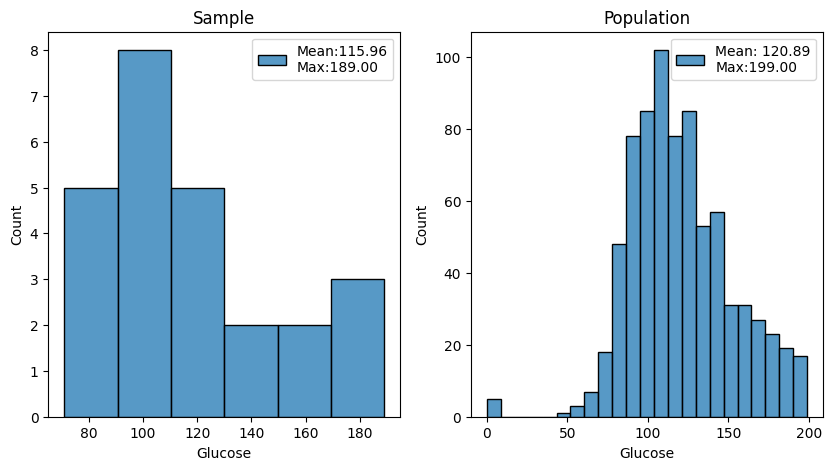

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# take a random sample of 25 rows and find mean and max of Glucose.
sample = data.sample(25, random_state=10)
mean = sample['Glucose'].mean()
max = sample['Glucose'].max()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(sample['Glucose'], ax=ax[0])
ax[0].set_title('Sample')
sns.histplot(data['Glucose'], ax=ax[1])
ax[1].set_title('Population')
# set legend showing mean and max
ax[0].legend([f"Mean:{mean:.2f}\nMax:{max:.2f}"])
ax[1].legend([f"Mean: {data['Glucose'].mean():.2f}\nMax:{data['Glucose'].max():.2f}"])
plt.show()

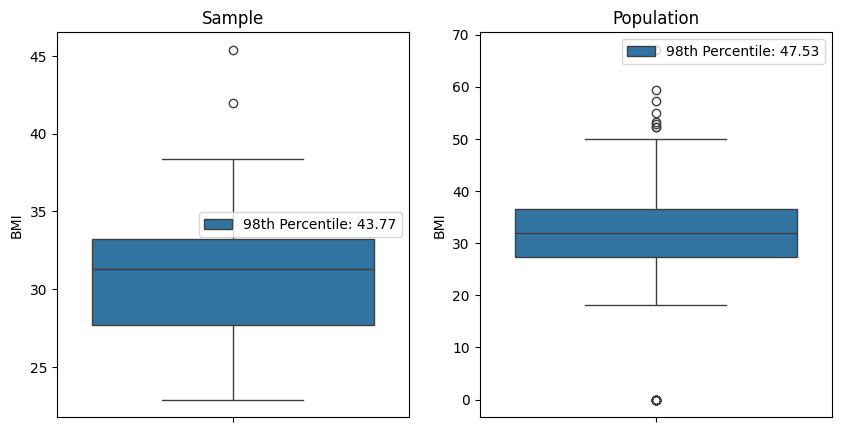

In [10]:
# find 98th percentile of BMI of sample
percentile = sample['BMI'].quantile(0.98)

# Show the 98th percetile using a boxplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(sample['BMI'], ax=ax[0])
ax[0].set_title('Sample')
sns.boxplot(data['BMI'], ax=ax[1])
ax[1].set_title('Population')
# set legend showing 98th percentile
ax[0].legend([f"98th Percentile: {percentile:.2f}"])
ax[1].legend([f"98th Percentile: {data['BMI'].quantile(0.98):.2f}"])
plt.show()

Bootstrapping does a remarkable job at getting us close to the population statistics. Using bootstrapping, even if we don't have access to the full population, we can still get incredibly close to the relavant statistics we need. It does seem to have added to the outliers, however.

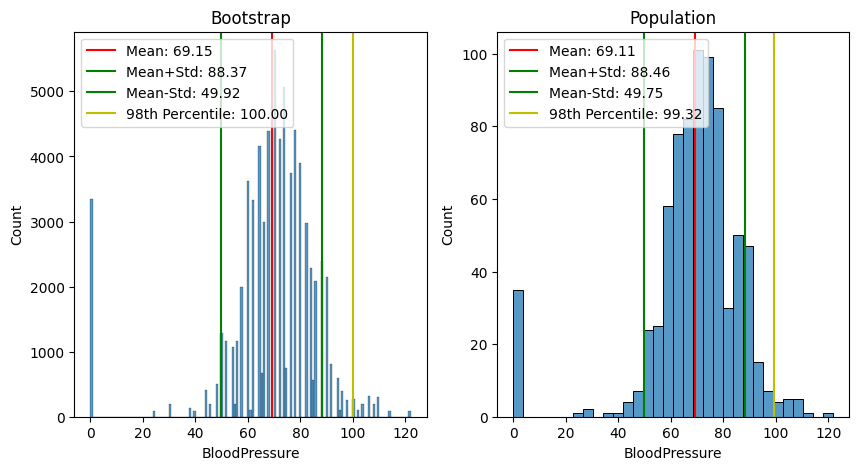

In [11]:
# use bootstrapping to create 500 samples of 150 rows each
bootstrap = pd.DataFrame()
for i in range(500):
    sample = data.sample(150, replace=True)
    bootstrap = pd.concat([bootstrap, sample])

# find mean, standard dev., and 98 percentile for BloodPressure
mean = bootstrap['BloodPressure'].mean()
std = bootstrap['BloodPressure'].std()
percentile = bootstrap['BloodPressure'].quantile(0.98)

# Show mean, standard deviation, and 98th percentile using a bar graph and draw a line to show 98th percentile
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(bootstrap['BloodPressure'], ax=ax[0])
ax[0].axvline(mean, color='r')
ax[0].axvline(mean + std, color='g')
ax[0].axvline(mean - std, color='g')
ax[0].axvline(percentile, color='y')
ax[0].set_title('Bootstrap')
sns.histplot(data['BloodPressure'], ax=ax[1])
ax[1].axvline(data['BloodPressure'].mean(), color='r')
ax[1].axvline(data['BloodPressure'].mean() + data['BloodPressure'].std(), color='g')
ax[1].axvline(data['BloodPressure'].mean() - data['BloodPressure'].std(), color='g')
ax[1].axvline(data['BloodPressure'].quantile(0.98), color='y')
ax[1].set_title('Population')
# set legend showing mean, standard deviation, and 98th percentile
ax[0].legend([f"Mean: {mean:.2f}", f"Mean+Std: {mean + std:.2f}", f"Mean-Std: {mean - std:.2f}", f"98th Percentile: {percentile:.2f}"])
ax[1].legend([f"Mean: {data['BloodPressure'].mean():.2f}", f"Mean+Std: {data['BloodPressure'].mean() + data['BloodPressure'].std():.2f}", f"Mean-Std: {data['BloodPressure'].mean() - data['BloodPressure'].std():.2f}", f"98th Percentile: {data['BloodPressure'].quantile(0.98):.2f}"])
plt.show()